# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Dataset_Klasifikasi.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4488, 7)


,provinsi,daerah,jenis,tahun,pengeluaran,pengeluaran_kategori,cluster
0,aceh,PERDESAAN,MAKANAN,2007.0,195176.0,Rendah,2
1,aceh,PERDESAAN,MAKANAN,2008.0,218781.0,Rendah,2
2,aceh,PERDESAAN,MAKANAN,2009.0,247427.0,Rendah,2
3,aceh,PERDESAAN,MAKANAN,2010.0,275749.0,Rendah,2
4,aceh,PERDESAAN,MAKANAN,2011.0,308000.0,Rendah,2


In [3]:
# Melakukan One-Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['provinsi', 'jenis', 'daerah', 'pengeluaran_kategori'])

# Memisahkan fitur (X) dan label (y) setelah encoding
X = df_encoded.drop(columns=['cluster'])
y = df_encoded['cluster']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 3590
Jumlah data uji: 898


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluasi Model Klasifikasi (Sebelum Tuning):")
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Evaluasi Model Klasifikasi (Sebelum Tuning):
Accuracy: 0.9955456570155902
F1 Score: 0.9955506131262987


In [9]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.99      0.99       355
           2       1.00      1.00      1.00       396

    accuracy                           1.00       898
   macro avg       0.99      1.00      0.99       898
weighted avg       1.00      1.00      1.00       898



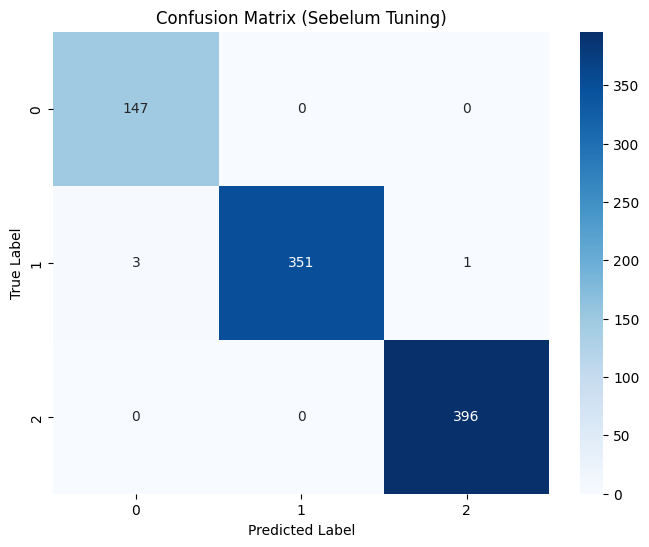

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Confusion Matrix (Sebelum Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [12]:
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("\nEvaluasi Model Klasifikasi (Setelah Tuning):")
print("Accuracy:", accuracy_tuned)
print("F1 Score:", f1_tuned)


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 0.9955456570155902
F1 Score: 0.9955506131262987


In [13]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.99      0.99       355
           2       1.00      1.00      1.00       396

    accuracy                           1.00       898
   macro avg       0.99      1.00      0.99       898
weighted avg       1.00      1.00      1.00       898



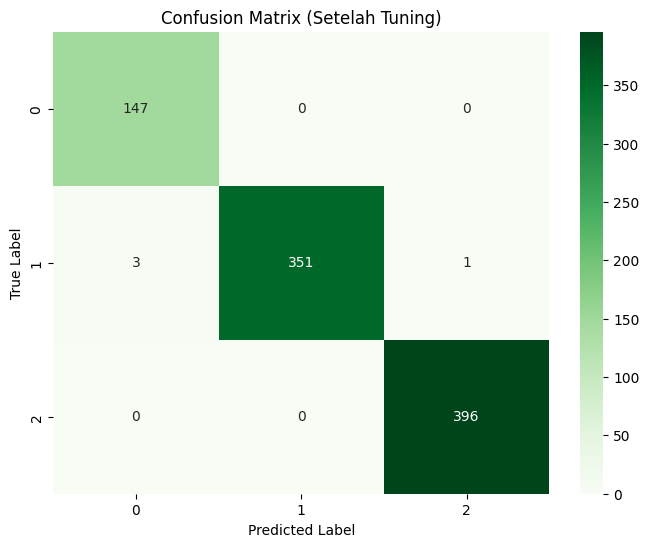

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_tuned),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("Confusion Matrix (Setelah Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.